In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [42]:
df = pd.read_csv("RELIANCE.csv")
df = df.dropna()
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023


In [43]:
df.tail()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523
5074,2020-05-29,RELIANCE,EQ,1472.25,1468.00,1472.00,1452.65,1470.00,1464.40,1462.79,18471770,2.702029e+15,300018.0,10292573.0,0.5572


In [44]:
df_close = df['Close']

In [45]:
df_close.shape

(2225,)

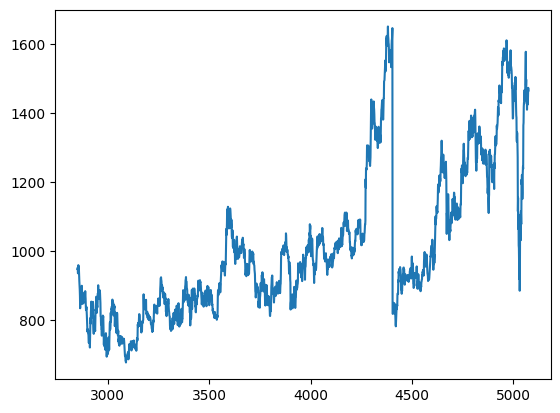

In [46]:
plt.plot(df_close)


In [47]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [48]:
df_close.shape


(2225, 1)

In [49]:
df_close


array([[0.27792608],
       [0.28228953],
       [0.26540041],
       ...,
       [0.78998973],
       [0.81740246],
       [0.80934292]])

In [50]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [51]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [53]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [54]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 25, batch_size = 64, verbose = 1)

Epoch 1/25
25/25 [==============================] - 9s 347ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 2/25
25/25 [==============================] - 9s 348ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/25
25/25 [==============================] - 8s 315ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/25
25/25 [==============================] - 9s 345ms/step - loss: 9.5788e-04 - val_loss: 0.0015
Epoch 5/25
25/25 [==============================] - 9s 348ms/step - loss: 9.2049e-04 - val_loss: 0.0021
Epoch 6/25
25/25 [==============================] - 8s 342ms/step - loss: 9.9387e-04 - val_loss: 0.0042
Epoch 7/25
25/25 [==============================] - 8s 315ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 8/25
25/25 [==============================] - 9s 347ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/25
25/25 [==============================] - 9s 350ms/step - loss: 9.8531e-04 - val_loss: 0.0014
Epoch 10/25
25/25 [==============================] - 8s 320ms/step - loss: 9.3627e-0

In [18]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
math.sqrt(mean_squared_error(y_train, train_predict))

952.4277182611734

In [21]:
math.sqrt(mean_squared_error(y_test, test_predict))

1266.4767065966316

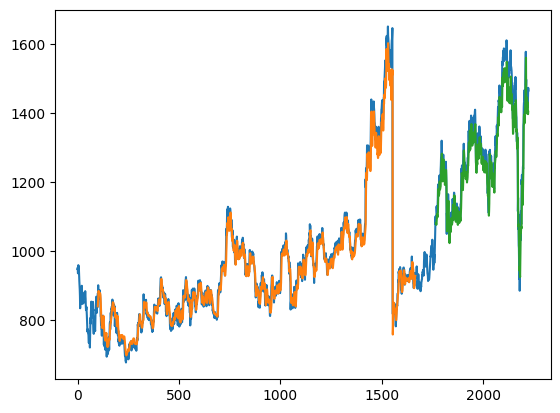

In [22]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data), x_test.shape

(557, (456, 100, 1))

In [24]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 350)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [31]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [33]:
len(df_close)

2225